# Limit equilibrium method

© 2022 Exneyder A. Montoya-Araque, Daniel F. Ruiz and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/eamontoyaa/EAFIT_slope_stability/blob/main/notebooks/limit_equilibrium_method.ipynb).

This notebook depends on:
* pyCSS v0.1.0 [Suárez-Burgoa & Montoya-Araque. (2016)](https://doi.org/10.15446/rev.fac.cienc.v5n2.59914)
* And other packages for general scientific programming in Python

## pyCSS

![Figure: Slope geometry variables](https://raw.githubusercontent.com/eamontoyaa/pyCSS/master/other_files/figures/slope_geometry.svg)

## Required modules and initial setup

In [1]:
# Installing pyCSS
!pip install pycss-lem

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from shapely.geometry import Polygon, LineString
from ipywidgets import interact, widgets
from pycss_lem import get_fos, get_min_fos

plt.style.use("default")
mpl.rcParams.update(
    {
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "serif",  # Use the Computer modern font
        "font.serif": "cmr10",
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False
    }
)

## Inputs for analyzing one circular failure surface

### Poject data

In [3]:
projectName = "Slope stability class at EAFIT"
projectAuthor = "EAFIT"
projectDate = time.strftime("%d/%m/%y")  # Automatic date

### Slope geometry

In [4]:
slopeHeight = [5, 'm']
slopeDip = [1.5, 1.0]
crownDist = [10, 'm']
toeDist = [5, 'm']
wantAutomaticToeDepth = False
toeDepth = [5, 'm']

### Watertable

In [5]:
wantWatertable = True
wtDepthAtCrown = [4.0, 'm']
toeUnderWatertable = False

### Materials properties

In [6]:
waterUnitWeight = [9.8, 'kN/m3']
materialUnitWeight = [17, 'kN/m3']
frictionAngleGrad = [27, 'degrees']
cohesion = [5, 'kPa']

### Advanced inputs

In [7]:
wantConstSliceWidthTrue = True
numSlices = 15  # Number of discretizations of slip surface
nDivs = numSlices  # Number of discretizations of circular arcs
methodString = 'Allm'  # Select the method to calcualte Fs ['Flns', 'Bshp' or 'Allm']
# Select the output format image 
outputFormatImg = '.svg'  # ['.eps', '.jpeg', '.jpg', '.pdf', '.pgf', '.png', '.ps', '.raw', '.rgba', '.svg', '.svgz', '.tif', '.tiff']

## Assessment of a single potential circular failure surface

### Geomoetry of the circular failure surface

In [8]:
hztDistPointAtCrownFromCrown = [-5, 'm']
hztDistPointAtToeFromCrown = [7.5, 'm']
slipRadius = [12, 'm']

### Running stability analysis

Analysis successfully performed!


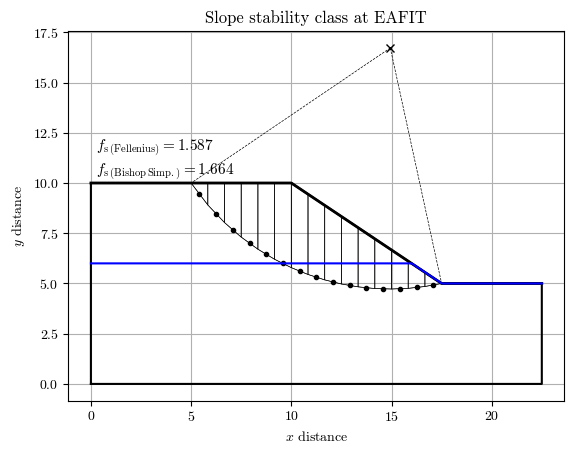

In [9]:
%matplotlib inline
msg = get_fos(
    projectName,
    projectAuthor,
    projectDate,
    slopeHeight,
    slopeDip,
    crownDist,
    toeDist,
    wantAutomaticToeDepth,
    toeDepth,
    hztDistPointAtCrownFromCrown,
    hztDistPointAtToeFromCrown,
    slipRadius,
    wantWatertable,
    wtDepthAtCrown,
    toeUnderWatertable,
    waterUnitWeight,
    materialUnitWeight,
    frictionAngleGrad,
    cohesion,
    wantConstSliceWidthTrue,
    numSlices,
    nDivs,
    methodString,
    outputFormatImg
)

## Inputs for getting the minimum $f_\mathrm{s}$

### Additional inputs to control how multiple surfaces are generated and evaluated

In [10]:
numSlices = 8  # Number of discretizations of slip surface
numCircles = 500  # Number of surfaces to assess
radiusIncrement = [3, 'm']  # Length of radius increment
numberIncrements = 5  # Number of radius increment
maxFsValueCont = 3  # Mask to plot fs at screen

### Running stability analysis

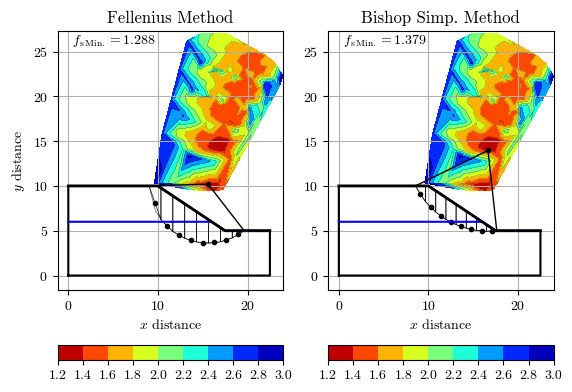

In [11]:
%matplotlib inline 
get_min_fos(
    projectName,
    projectAuthor,
    projectDate,
    slopeHeight,
    slopeDip,
    crownDist,
    toeDist,
    wantAutomaticToeDepth,
    toeDepth,
    numCircles,
    radiusIncrement,
    numberIncrements,
    maxFsValueCont,
    wantWatertable,
    wtDepthAtCrown,
    toeUnderWatertable,
    waterUnitWeight,
    materialUnitWeight,
    frictionAngleGrad,
    cohesion,
    wantConstSliceWidthTrue,
    numSlices,
    nDivs,
    methodString,
    outputFormatImg,
)
